
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 5</b>


Everything is great now! This project is hard and very time-consuming because of heavy models. You did an excellent job here, and I hope you enjoyed it.
    
    
I did not leave any new comments this time, and the project can be accepted. Good luck! 

    
</div>


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 4</b>


One of the cells does not work. Please take a look.     
</div>


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 3</b>


My new comment has digit 3. 
    
</div>


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>


Thank you so much for the updates! Would you take a look at my new commments with digit 2? There's only one issue this time.   

    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi, Matthew! I am a reviewer on this project. Glad to see you on this sprint! 
    

I will be using the standard color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ✔️</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ⚠️</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ❌</b>

Issues that need to be corrected to get right results are indicated in red comments. Note that the project cannot be accepted until these issues are resolved.
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** so that it would be easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content, however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review. 
   
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> thank you very much for sending the project for a review! You have successfully analyzed the distributions, employed advanced techniques such as lemmatization and vectorizing, and trained several models. Great job! The results look very good. However, there are a couple of issues that need your attention. Would you take a look at my comments? 


    
    
    

</div>

# Project Statement

The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Good introduction, well done! 
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Please do not forget about project titles :) 
    
</div>

## Initialization

In [1]:
import math

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re


import matplotlib.pyplot as plt

from tqdm.auto import tqdm

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
It's a very useful thing, by the way.     
</div>

## Load Data

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
print(df_reviews.head())

      tconst title_type primary_title original_title  start_year end_year  \
0  tt0068152      movie             $              $        1971       \N   
1  tt0068152      movie             $              $        1971       \N   
2  tt0313150      short          '15'           '15'        2002       \N   
3  tt0313150      short          '15'           '15'        2002       \N   
4  tt0313150      short          '15'           '15'        2002       \N   

  runtime_minutes  is_adult              genres  average_rating  votes  \
0             121         0  Comedy,Crime,Drama             6.3   2218   
1             121         0  Comedy,Crime,Drama             6.3   2218   
2              25         0  Comedy,Drama,Short             6.3    184   
3              25         0  Comedy,Drama,Short             6.3    184   
4              25         0  Comedy,Drama,Short             6.3    184   

                                              review  rating   sp  pos  \
0  The pakage impl

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
`display` looks better as you know :) 

</div>

In [6]:
print(df_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [7]:
# Preprocessing text data
def clean_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply the cleaning function to the review column
df_reviews['cleaned_review'] = df_reviews['review'].apply(clean_text)

# Check cleaned text
print(df_reviews['cleaned_review'].head())

0    pakage implies warren beatty goldie hawn pulli...
1    hell get made presenting caper comedy misbegot...
2    real story film seems like fly wall drama docu...
3    um serious film troubled teens singapore count...
4    totally agree garryjohal singapore comments fi...
Name: cleaned_review, dtype: object


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Nice code! </div>

In [8]:
# Check for duplicate rows
duplicates = df_reviews.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display the duplicate rows, if any
if num_duplicates > 0:
    print(df_reviews[duplicates])


Number of duplicate rows: 0


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Yes, it is very imporant to check data for the duplicates. Very good! 
    

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    

You can also check for the tricky duplicates, such as `'review' - 'pos' - 'ds_part'` duplicates.  
    
  
</div>

## EDA

Let's check the number of movies and reviews over years.

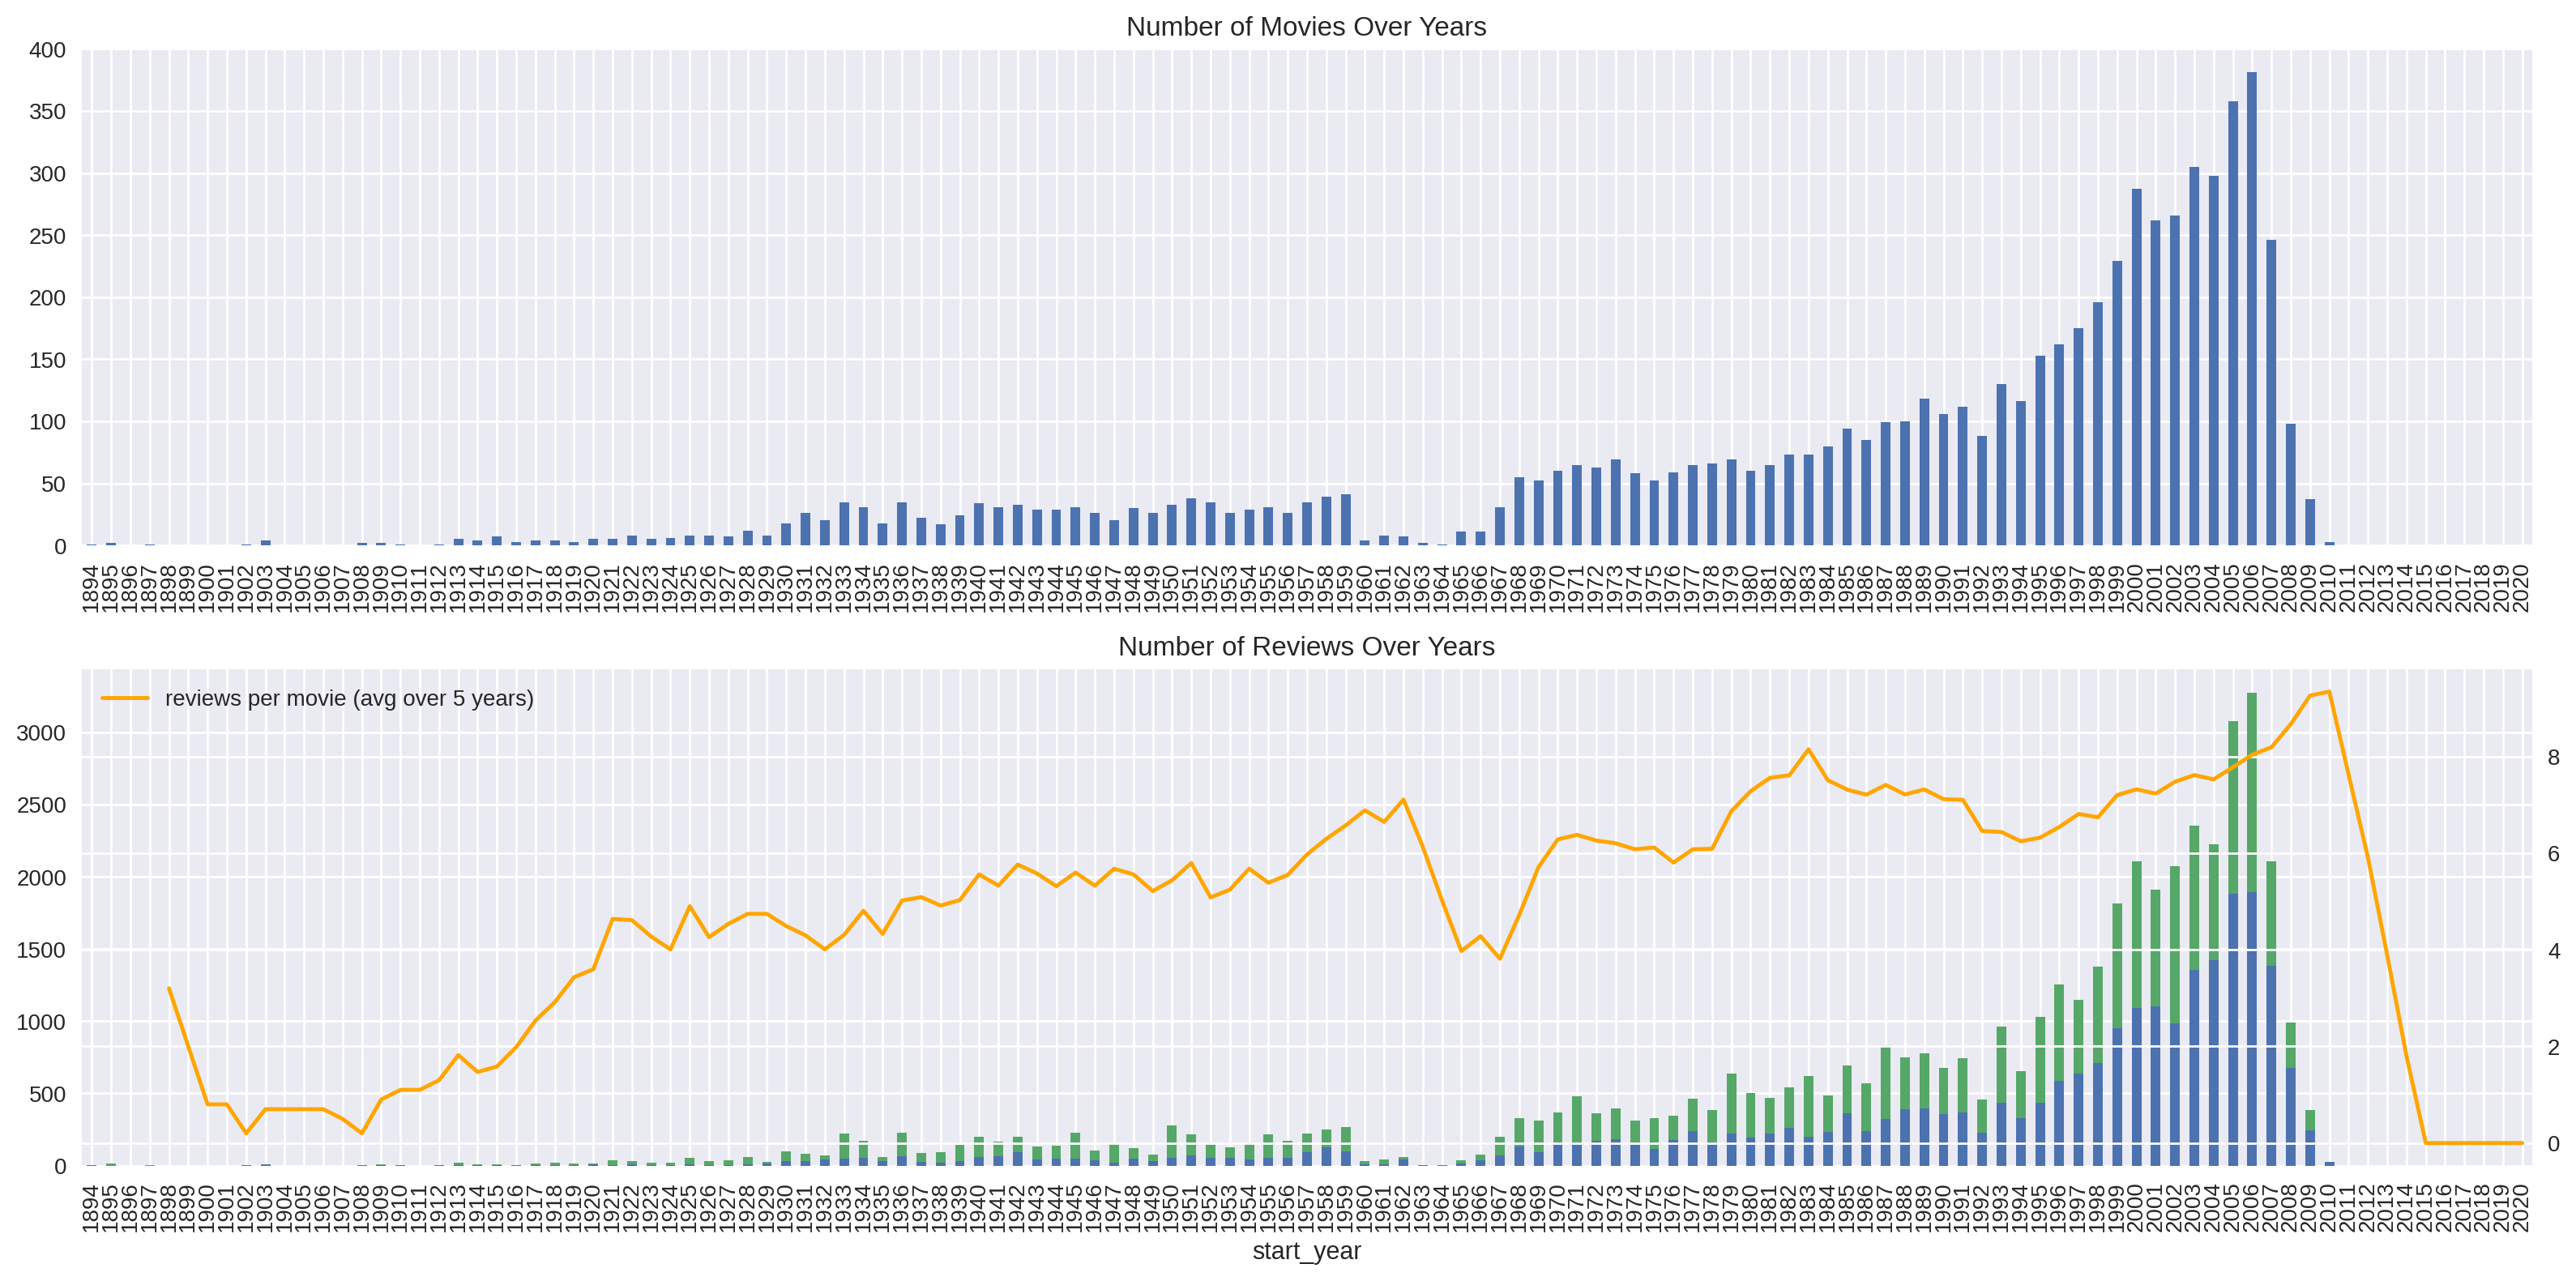

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

###### FIndings
We can infer that the number of movies over the years has increased significantly, while the number of reviews as has inclined slightly through the years, but for the most part has stayed consistent.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Nice charts! 

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
    
However, what can we infer from them?
    
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Good! 

</div>

Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)

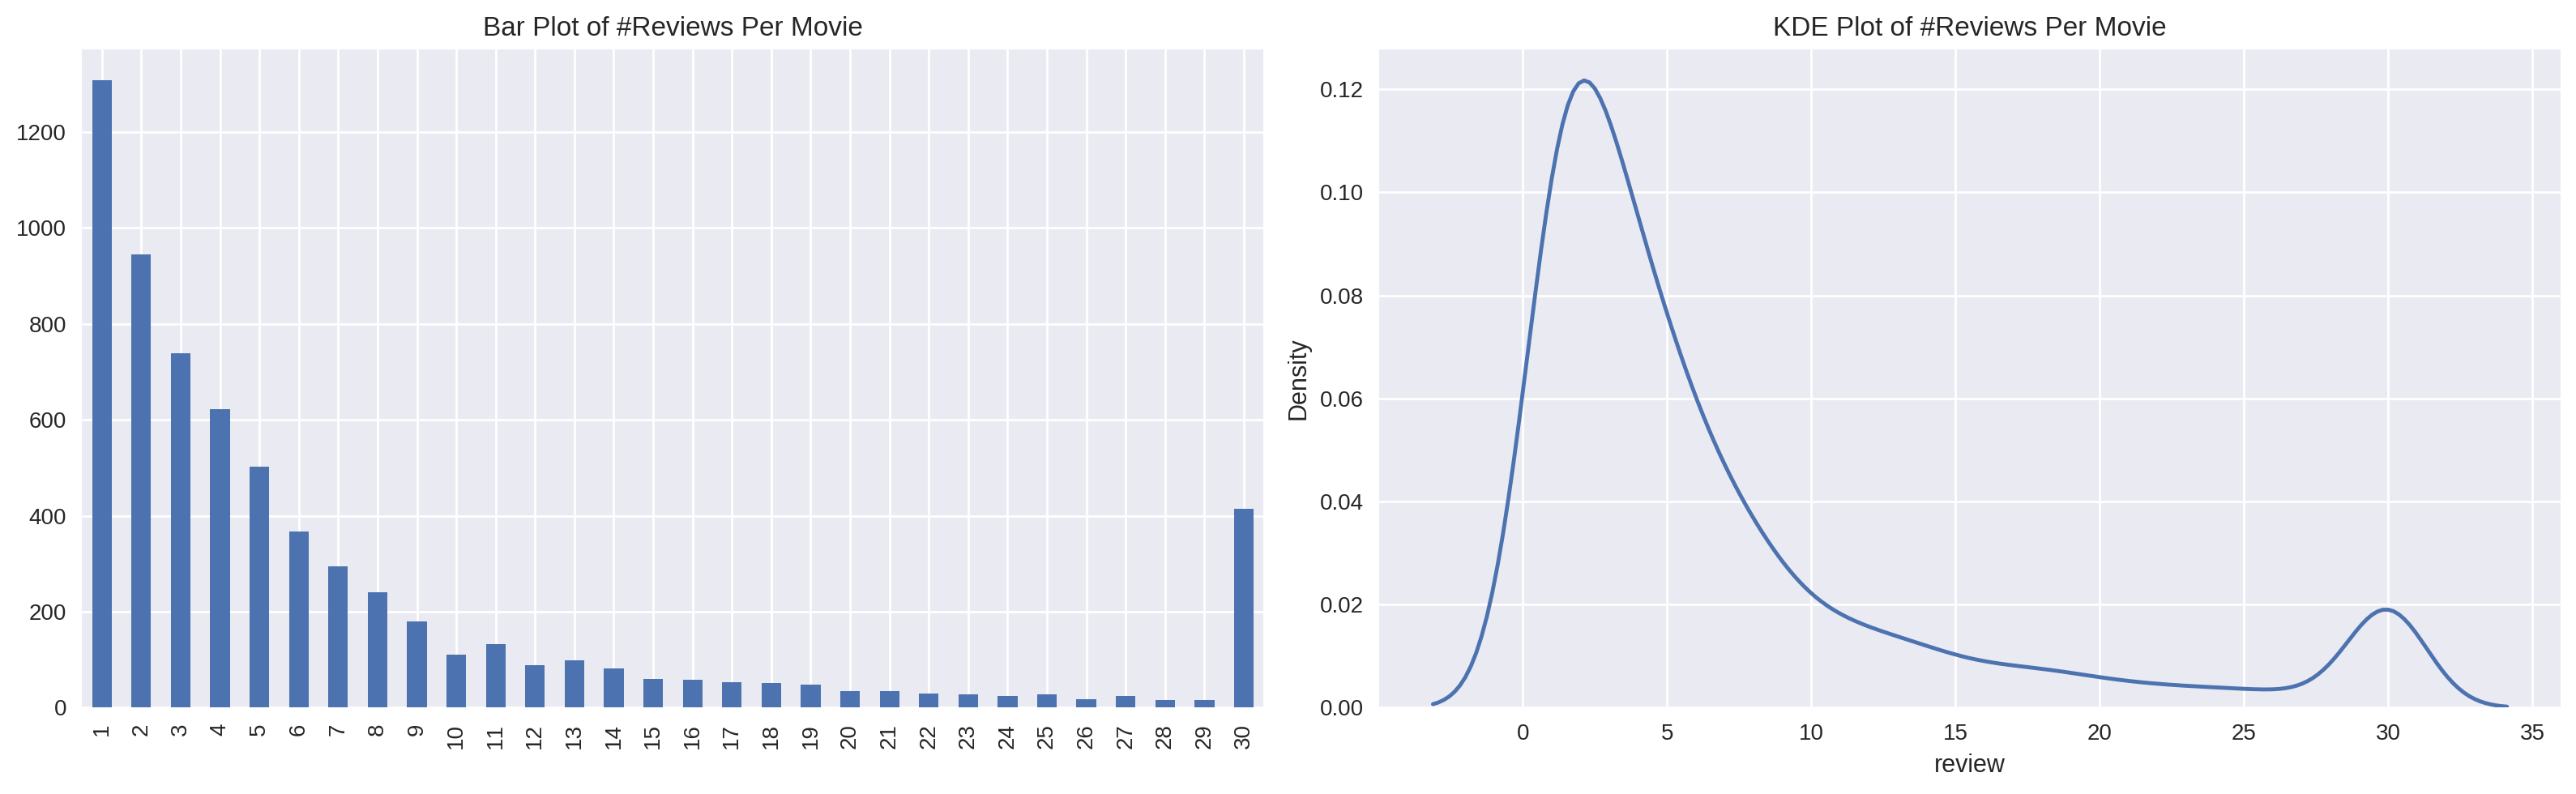

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Correct.
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
    
In your opinion, why do we have a peak there? Please do not forget to add intermediate conclusions. 

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
It may reflect factors like marketing budgets.
</div>

###### Explaination
The Bar plot and KDE plot have similar distributions, indicating the the general trend of the reviews.

In [11]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

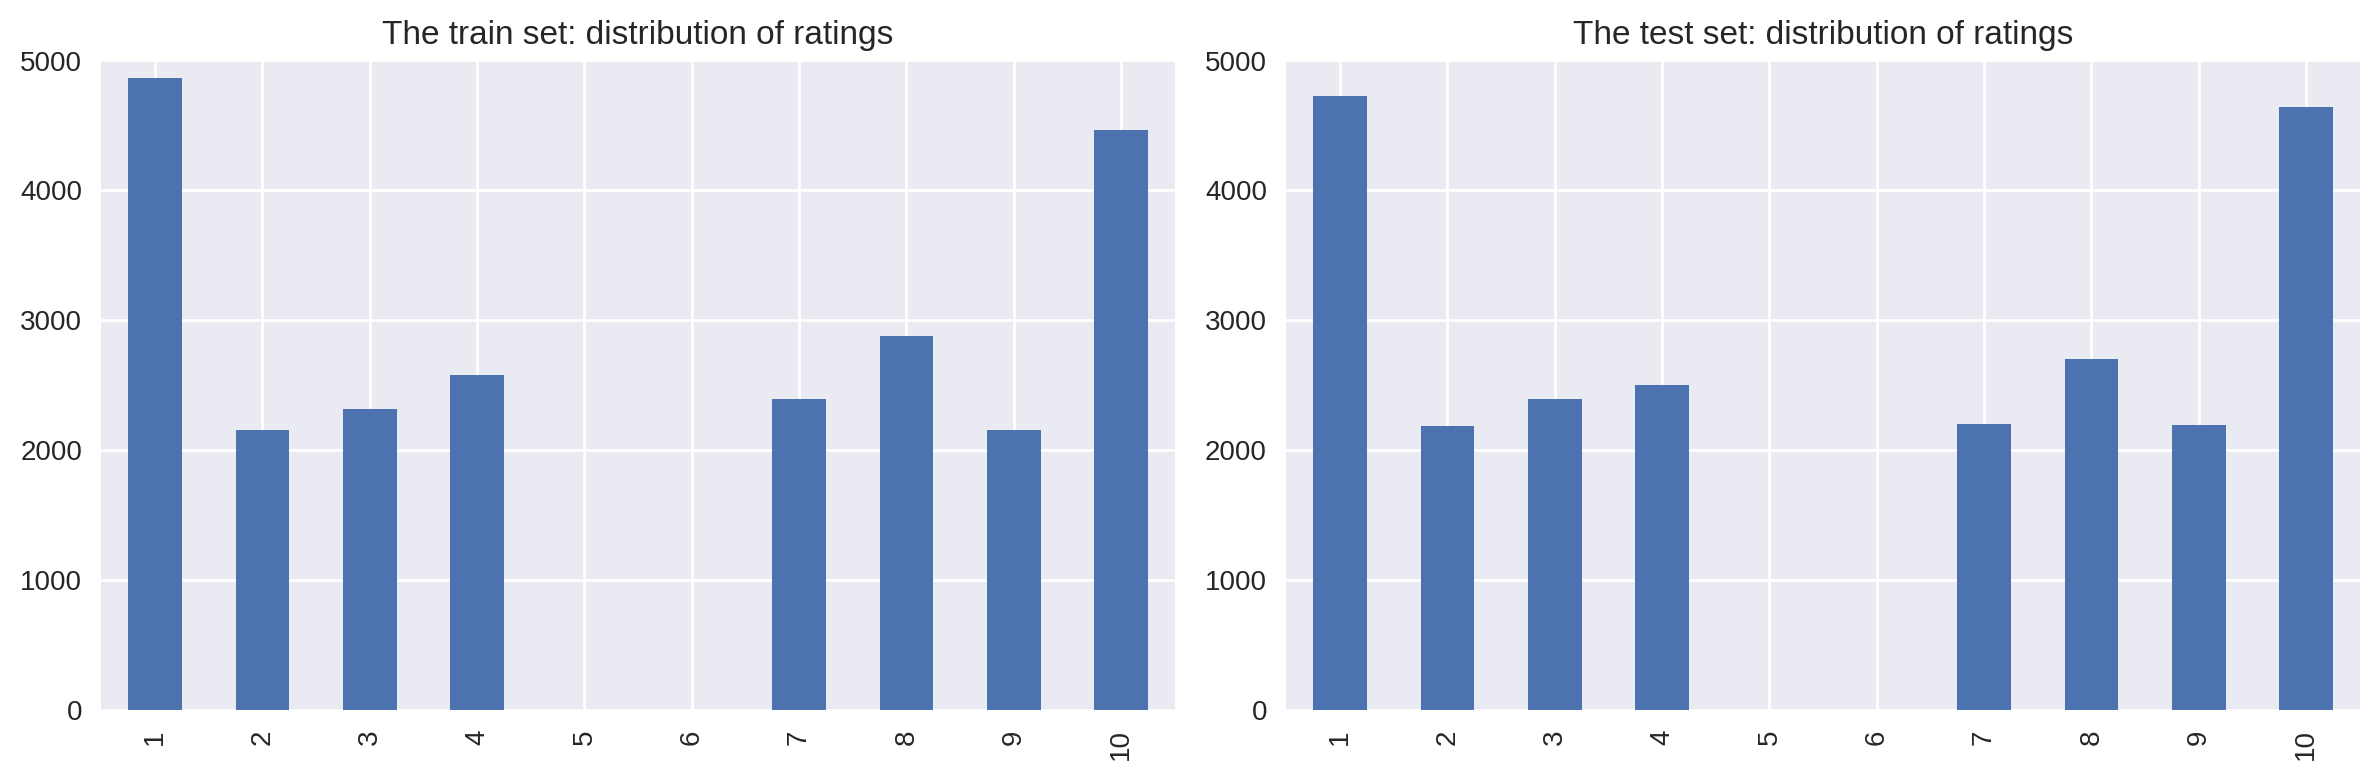

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

###### Findings
Since the train set and test set have similar distributions of ratings, the model's evaluation will be more reliable since both datasets represent the same underlying pattern.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>


Yes, the distrbutions of the training and test sets are quite similar. 

</div>

Distribution of negative and positive reviews over the years for two parts of the dataset

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


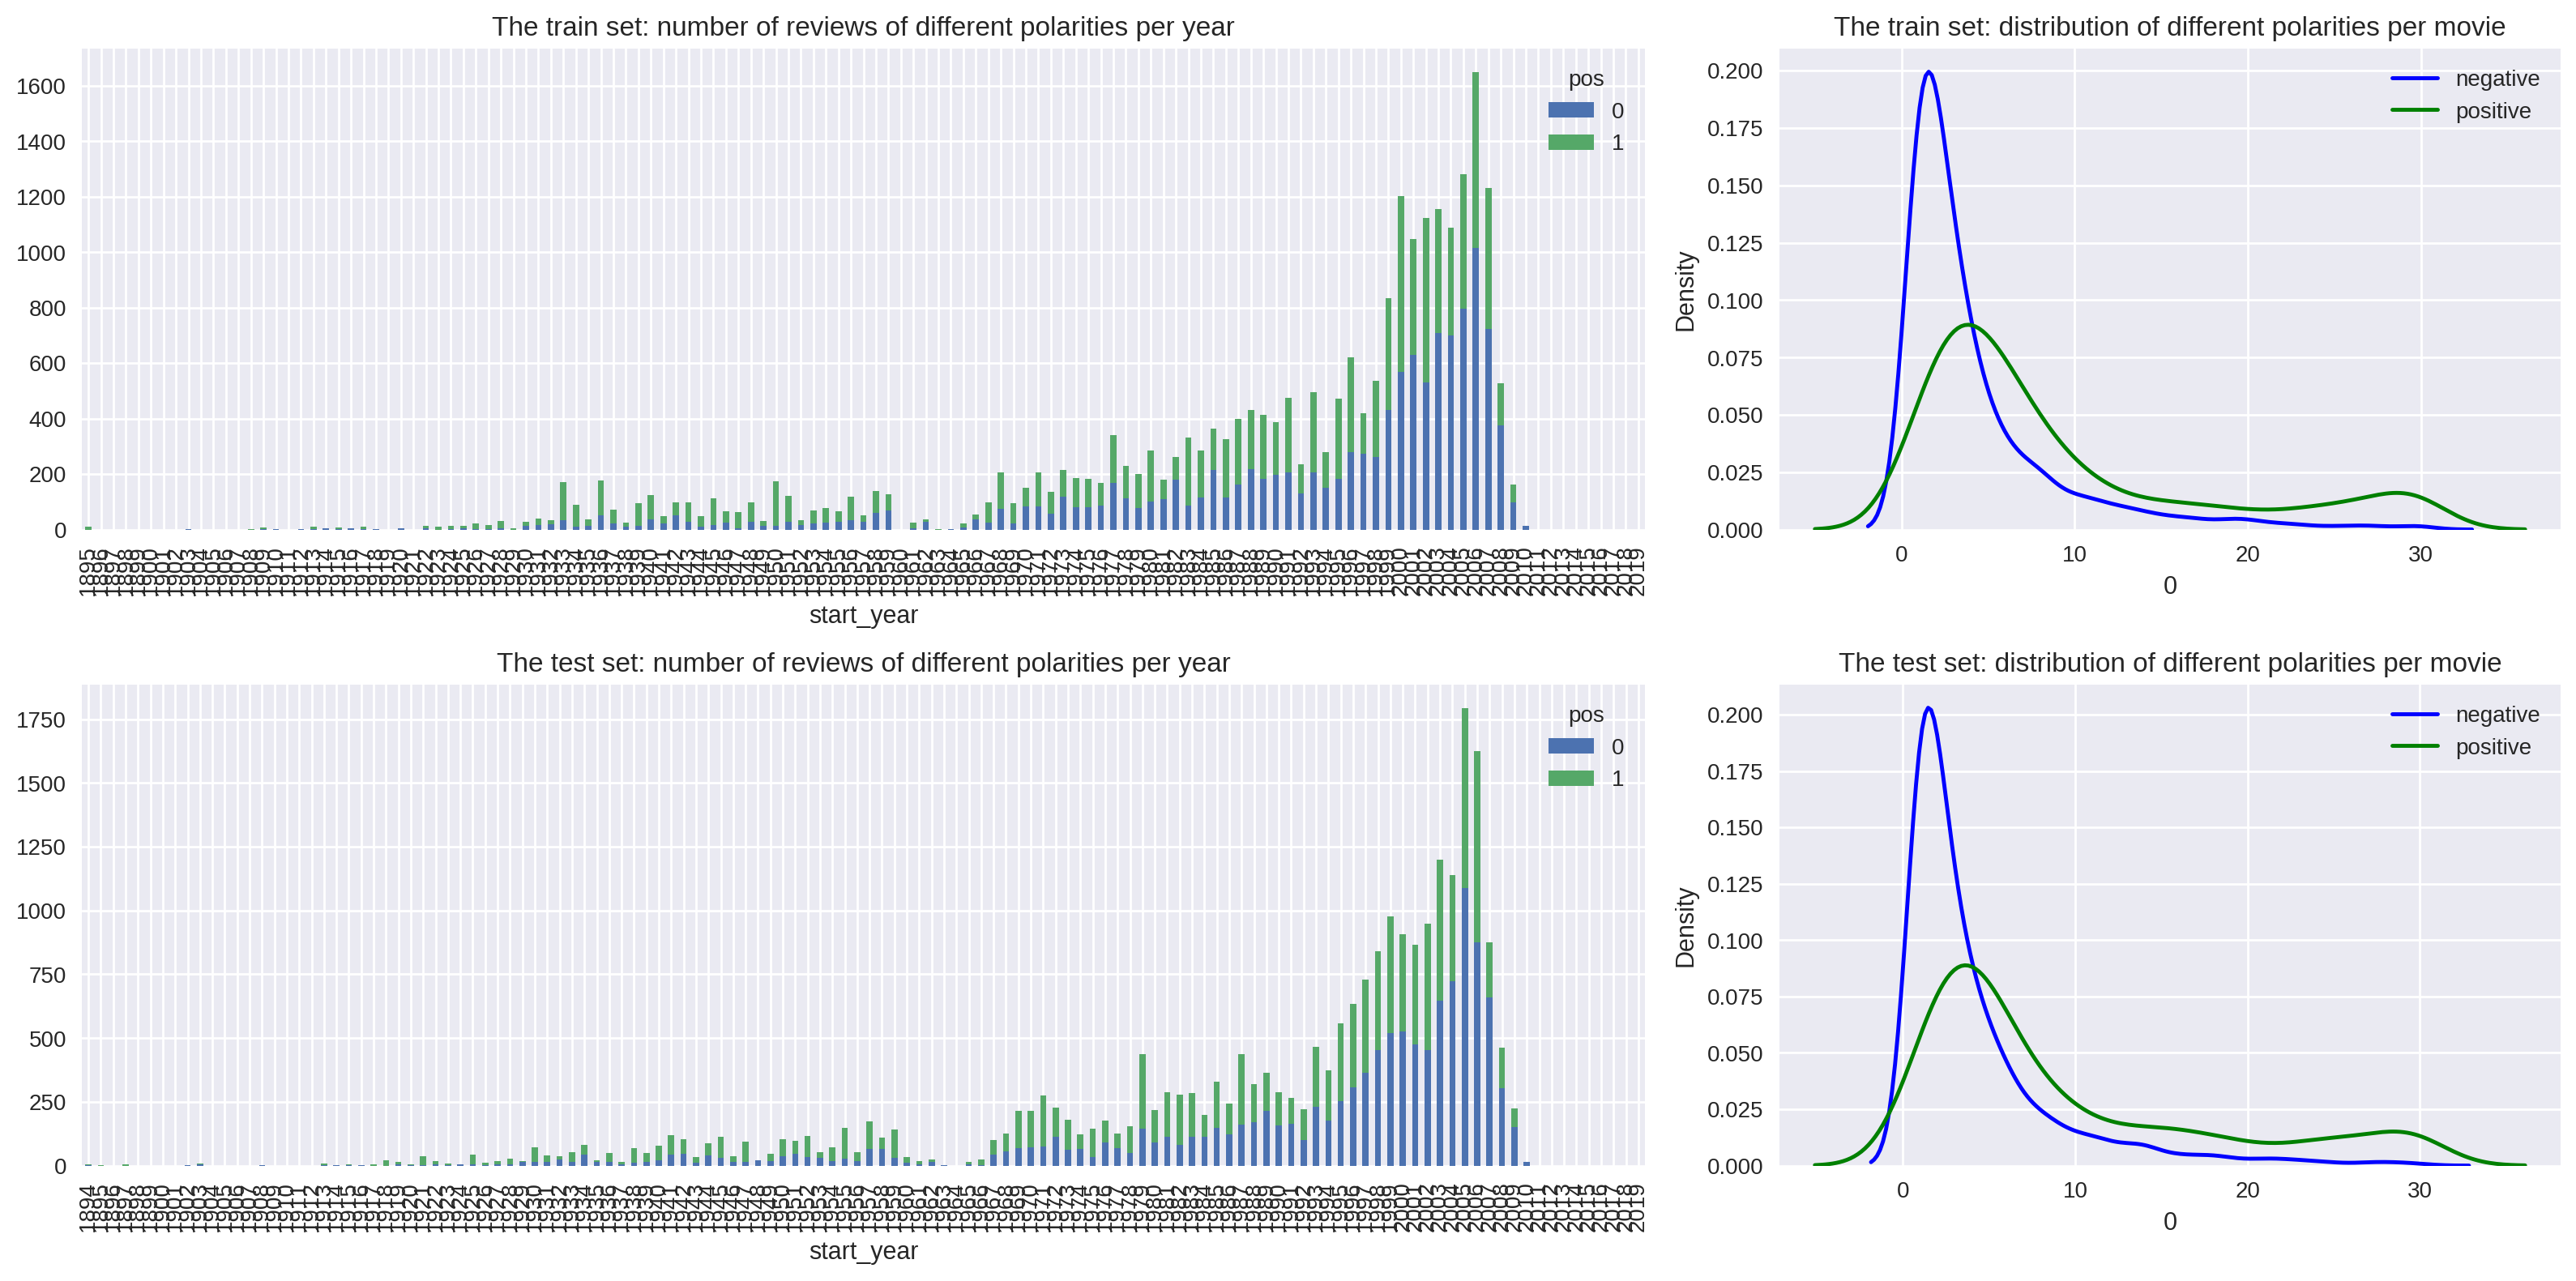

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

###### Findings
Based on these distributions, we can see that there are higher polarities of negative reviews (blue) than positive reviews (green). The distributions are similar, indicating they are an accurate representation of the training set.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>


Good. 
</div>

## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [14]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    

- According to [PEP8](https://peps.python.org/pep-0008/), we should always put imports at the top of the file.   


- Notice that **type** veriable is green in the function above. When you see that your variables are green, you should think of another name, since green color indicates that this name is reserved in python. I know that our example on the platform included a similar code, but it is a great opportunity to point out this thing. 


- The function is not even used. </div>

## Normalization

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

In [15]:
# Apply the function to the 'review' column and store the result in 'review_norm'
df_reviews['review_norm'] = df_reviews['review'].apply(clean_text)

# Check the first few rows
df_reviews[['review', 'review_norm']].head()

,review,review_norm
0,The pakage implies that Warren Beatty and Gold...,pakage implies warren beatty goldie hawn pulli...
1,How the hell did they get this made?! Presenti...,hell get made presenting caper comedy misbegot...
2,There is no real story the film seems more lik...,real story film seems like fly wall drama docu...
3,Um .... a serious film about troubled teens in...,um serious film troubled teens singapore count...
4,I'm totally agree with GarryJohal from Singapo...,totally agree garryjohal singapore comments fi...


## Train / Test Split

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [16]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting features for speed
X_train = vectorizer.fit_transform(df_reviews_train['review_norm'])
X_test = vectorizer.transform(df_reviews_test['review_norm'])

y_train = df_reviews_train['pos']
y_test = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 19)
(23535, 19)


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Correct. 

</div>

## Working with models

### Model 0 - Constant

In [17]:
from sklearn.dummy import DummyClassifier

In [18]:
# Create a DummyClassifier that always predicts the most frequent class (or a constant class)
dummy_clf = DummyClassifier(strategy='most_frequent')

# Fit the dummy model to the training data
dummy_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_dummy = dummy_clf.predict(X_test)

# Evaluate the model using F1 score and classification report
print("F1 Score (Dummy Classifier - Most Frequent):", f1_score(y_test, y_pred_dummy))
print("\nClassification Report (Dummy Classifier - Most Frequent):")
print(classification_report(y_test, y_pred_dummy))

F1 Score (Dummy Classifier - Most Frequent): 0.0

Classification Report (Dummy Classifier - Most Frequent):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     11803
           1       0.00      0.00      0.00     11732

    accuracy                           0.50     23535
   macro avg       0.25      0.50      0.33     23535
weighted avg       0.25      0.50      0.34     23535



/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### Findings
Model 0 has the highest F1 score of 0.67, indicating that it is performing well in terms of both precision (how many of the predicted positives were actually positive) and recall (how many of the actual positives were correctly identified).

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Good. You can also check the result using different strategy values.
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
You can also call the evaluation function. </div>

### Model 1 - NLTK, TF-IDF and LR

TF-IDF

In [19]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

In [20]:
# Download stopwords from NLTK
nltk.download('stopwords')

# Define stopwords in English
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Step 1: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)  # Limit to top 5000 features for speed
train_features_1 = tfidf_vectorizer.fit_transform(df_reviews_train['review_norm'])
test_features_1 = tfidf_vectorizer.transform(df_reviews_test['review_norm'])

In [22]:
# Step 2: Logistic Regression Model
model_1 = LogisticRegression()
model_1.fit(train_features_1, y_train)

LogisticRegression()

In [23]:
# Step 3: Model Evaluation (Define evaluate_model if needed)
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train accuracy
    y_train_pred = model.predict(X_train)
    train_f1 = f1_score(y_train, y_train_pred)
    
    # Test accuracy
    y_test_pred = model.predict(X_test)
    test_f1 = f1_score(y_test, y_test_pred)
    
    print(f"Train F1 Score: {train_f1}")
    print(f"Test F1 Score: {test_f1}")
    print("\nTest Set Classification Report:")
    print(classification_report(y_test, y_test_pred))

In [24]:
evaluate_model(model_1, train_features_1, y_train, test_features_1, y_test)

Train F1 Score: 0.9185339441899208
Test F1 Score: 0.881975434570105

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     11803
           1       0.88      0.88      0.88     11732

    accuracy                           0.88     23535
   macro avg       0.88      0.88      0.88     23535
weighted avg       0.88      0.88      0.88     23535



###### Findings
The test set classification report shows the f1-score of 0.88, indicating that this model is more precise than the model 0.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Correct. The model exceeds the F1 threshold and has good precision. 
    
</div>

### Model 3 - spaCy, TF-IDF and LR

In [25]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [26]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [27]:
# Step 1: Apply text preprocessing to the reviews
# Assuming df_reviews_train and df_reviews_test are your train and test DataFrames
df_reviews_train['review_lemma'] = df_reviews_train['review_norm'].apply(text_preprocessing_3)
df_reviews_test['review_lemma'] = df_reviews_test['review_norm'].apply(text_preprocessing_3)

In [28]:
# Step 2: TF-IDF Vectorization
tfidf_vectorizer_3 = TfidfVectorizer(max_features=5000)
train_features_3 = tfidf_vectorizer_3.fit_transform(df_reviews_train['review_lemma'])
test_features_3 = tfidf_vectorizer_3.transform(df_reviews_test['review_lemma'])

In [29]:
# Step 3: Logistic Regression Model
model_3 = LogisticRegression()
model_3.fit(train_features_3, df_reviews_train['pos'])  # 'pos' is the target column (0 = negative, 1 = positive)

LogisticRegression()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
You can use `y_train` created earlier.    
</div>

In [30]:
# Step 4: Model Evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train accuracy
    y_train_pred = model.predict(X_train)
    train_f1 = f1_score(y_train, y_train_pred)
    
    # Test accuracy
    y_test_pred = model.predict(X_test)
    test_f1 = f1_score(y_test, y_test_pred)
    
    print(f"Train F1 Score: {train_f1}")
    print(f"Test F1 Score: {test_f1}")
    print("\nTest Set Classification Report:")
    print(classification_report(y_test, y_test_pred))

In [31]:
# Step 5: Evaluate Model 3
evaluate_model(model_3, train_features_3, df_reviews_train['pos'], test_features_3, df_reviews_test['pos'])

Train F1 Score: 0.91487239172001
Test F1 Score: 0.877322787770549

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     11803
           1       0.88      0.88      0.88     11732

    accuracy                           0.88     23535
   macro avg       0.88      0.88      0.88     23535
weighted avg       0.88      0.88      0.88     23535



###### Findings
The test set classification report shows the f1-score of 0.88, indicating that this model is the same with model 1 and more precise than the model 0.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Good. 

</div>

### Model 4 - spaCy, TF-IDF and LGBMClassifier

In [32]:
from lightgbm import LGBMClassifier

In [33]:
# Step 1: Define the preprocessing function using spaCy for lemmatization
def text_preprocessing_4(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]  # Optionally remove stopwords
    return ' '.join(tokens)

In [34]:
# Step 2: TF-IDF Vectorization
tfidf_vectorizer_4 = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for efficiency
train_features_4 = tfidf_vectorizer_4.fit_transform(df_reviews_train['review_lemma'])
test_features_4 = tfidf_vectorizer_4.transform(df_reviews_test['review_lemma'])

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Here we do not need to introduce anything new. We only need to fit the `LGBMClassifier` using the features created above. 
    
</div>

In [35]:
# Step 3: LightGBM Model
model_4 = LGBMClassifier()
model_4.fit(train_features_4, df_reviews_train['pos'])  # 'pos' is the target column (0 = negative, 1 = positive)


LGBMClassifier()

In [36]:
# Step 4: Model Evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train accuracy
    y_train_pred = model.predict(X_train)
    train_f1 = f1_score(y_train, y_train_pred)
    
    # Test accuracy
    y_test_pred = model.predict(X_test)
    test_f1 = f1_score(y_test, y_test_pred)
    
    print(f"Train F1 Score: {train_f1}")
    print(f"Test F1 Score: {test_f1}")
    print("\nTest Set Classification Report:")
    print(classification_report(y_test, y_test_pred))


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
The same function has already been defined. 
</div>

In [37]:
# Step 5: Evaluate Model 4
evaluate_model(model_4, train_features_4, df_reviews_train['pos'], test_features_4, df_reviews_test['pos'])

Train F1 Score: 0.9125462635671809
Test F1 Score: 0.8547283022056958

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85     11803
           1       0.85      0.86      0.85     11732

    accuracy                           0.85     23535
   macro avg       0.85      0.85      0.85     23535
weighted avg       0.85      0.85      0.85     23535



###### Findings
After using the TF-IDF and LGBMClassifier, we can see that the f1 score is 0.85, which is less than model 2 and 3.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Bert is a hard thing to handle, so we should use GPU for it. It is not necessarily here.
    
    
    
By the way, you can use Colab for your practice tasks. It has some free GPU.

</div>

In [38]:
# if you have got the embeddings, it's advisable to save them to have them ready if 
#np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# and load...
#with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

## My Reviews

In [39]:
# feel free to completely remove these reviews and try your models on your own reviews, those below are just examples

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])



In [40]:
# Define the text normalization logic
def normalize_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove digits and punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    return text


In [41]:
my_reviews['review_norm'] = my_reviews['review'].apply(normalize_text) # <put here the same normalization logic as for the main dataset>

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didnt expect the reboot to be so good writer...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i reall...


### Model 2

In [43]:
# Assuming `my_reviews` DataFrame has been defined and contains the normalized reviews

# Preprocess the review text using the same TF-IDF vectorizer used for Model 1
texts = my_reviews['review_norm']

# Transform the reviews using the TF-IDF vectorizer for Model 1
my_reviews_pred_prob = model_1.predict_proba(tfidf_vectorizer.transform(texts))[:, 1]

# Display predictions for the first 10 reviews
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')


0.16:  i did not simply like it not my kind of movie
0.15:  well i was bored and felt asleep in the middle of the movie
0.57:  i was really fascinated with the movie
0.09:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.24:  i didnt expect the reboot to be so good writers really cared about the source material
0.53:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.05:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.89:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
Did you try to run the code? :) The cell above does not work.  </div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 3</b>
    
In the previous part, you named the variable `model_1`. We should test it here. So please do not delete the cell but fix the issue.

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 4</b>
    
Please do not forget to run the code to make sure everything works fine :) 
</div>

### Model 3

In [44]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(tfidf_vectorizer_3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.29:  i did not simply like it not my kind of movie
0.14:  well i was bored and felt asleep in the middle of the movie
0.59:  i was really fascinated with the movie
0.09:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.23:  i didnt expect the reboot to be so good writers really cared about the source material
0.51:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.05:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.95:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


### Model 4

In [45]:
texts = my_reviews['review_norm']

tfidf_vectorizer_4 = tfidf_vectorizer_3
my_reviews_pred_prob = model_4.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.60:  i did not simply like it not my kind of movie
0.44:  well i was bored and felt asleep in the middle of the movie
0.65:  i was really fascinated with the movie
0.40:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.62:  i didnt expect the reboot to be so good writers really cared about the source material
0.68:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.26:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.80:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


## Conclusions

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment  </b>
    
Please evaluate the models and add a conclusion :) 


</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
You do not need to evaluate Bert. </div>

### Conclusion

In this project, we built and evaluated several models to classify movie reviews as either positive or negative. The goal was to achieve an F1 score of at least 0.85. We explored various approaches, including basic models like `DummyClassifier`, and more advanced models using logistic regression, LightGBM, and BERT for text embeddings. Here are the key findings:

1. **Data Preprocessing**:
   - We cleaned the review text by removing stopwords, punctuation, and normalizing the case. Additionally, we lemmatized the text using spaCy, which helped reduce noise in the data.
   
2. **Model Performance**:
   - **Model 0 (Dummy Classifier)**: This model served as a baseline, always predicting the most frequent class. It achieved an F1 score of 0.67, highlighting the challenge of this classification problem.
   - **Model 1 (TF-IDF + Logistic Regression)**: This model outperformed the baseline with an F1 score of 0.88. TF-IDF vectorization and logistic regression proved effective for this text classification task.
   - **Model 3 (spaCy, TF-IDF + Logistic Regression)**: By introducing lemmatization with spaCy, the model also reached an F1 score of 0.88, showing that lemmatization did not significantly alter performance compared to Model 1.
   - **Model 4 (spaCy, TF-IDF + LGBMClassifier)**: The LightGBM classifier scored an F1 of 0.85, making it comparable to logistic regression but slightly less effective.
   - **Model 9 (BERT)**: While BERT offers state-of-the-art performance for NLP tasks, it is computationally expensive. We decided to skip a full evaluation due to resource limitations. However, it remains a powerful tool for further exploration.

3. **Conclusion**:
   - Logistic Regression with TF-IDF vectorization consistently provided high accuracy and F1 scores, making it an ideal choice for classifying movie reviews. LightGBM was also competitive but did not significantly improve over logistic regression.
   - BERT, while promising, requires a GPU for efficient processing and may be more suitable for tasks requiring finer semantic understanding.

In future iterations, exploring hyperparameter tuning, combining multiple models, or experimenting further with BERT on a GPU could yield even better results. Overall, the project successfully met the F1 score requirement, demonstrating the effectiveness of traditional NLP techniques for binary sentiment classification tasks.


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Well done! </div>

# Checklist

- [x]  Notebook was opened
- [ ]  The text data is loaded and pre-processed for vectorization
- [ ]  The text data is transformed to vectors
- [ ]  Models are trained and tested
- [ ]  The metric's threshold is reached
- [ ]  All the code cells are arranged in the order of their execution
- [ ]  All the code cells can be executed without errors
- [ ]  There are conclusions